In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look nicer
sns.set(style="whitegrid", context="notebook")

# For reproducibility
RANDOM_SEED = 25
np.random.seed(RANDOM_SEED)

In [10]:
dataset= pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
dataset.info()
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
np.random.seed(RANDOM_SEED)

sample_25 = dataset.sample(n=25, replace=False, random_state=RANDOM_SEED)

# Sample statistics
sample_mean_glu = sample_25["Glucose"].mean()
sample_max_glu = sample_25["Glucose"].max()

# Population statistics
pop_mean_glu = dataset["Glucose"].mean()
pop_max_glu = dataset["Glucose"].max()

sample_mean_glu, sample_max_glu, pop_mean_glu, pop_max_glu


(np.float64(110.24), 144, np.float64(120.89453125), 199)

bar charts

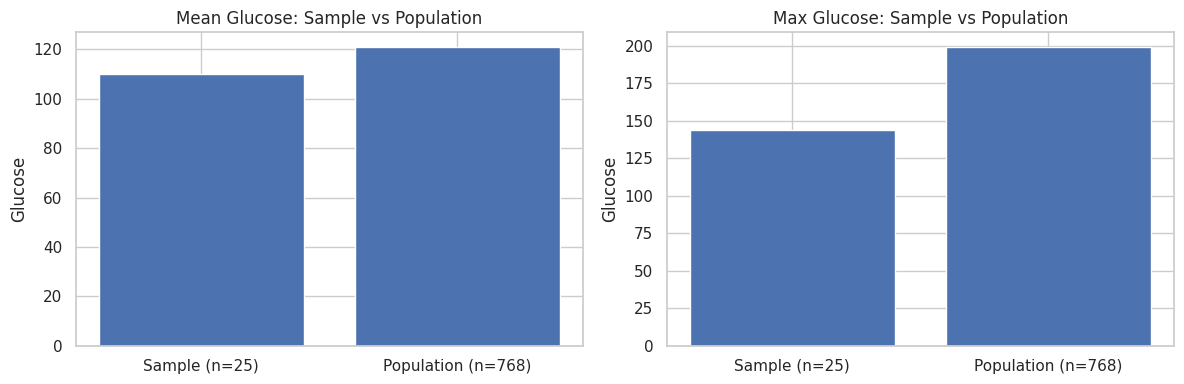

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Mean
axes[0].bar(["Sample (n=25)", "Population (n=768)"],
            [sample_mean_glu, pop_mean_glu])
axes[0].set_title("Mean Glucose: Sample vs Population")
axes[0].set_ylabel("Glucose")

# Max
axes[1].bar(["Sample (n=25)", "Population (n=768)"],
            [sample_max_glu, pop_max_glu])
axes[1].set_title("Max Glucose: Sample vs Population")
axes[1].set_ylabel("Glucose")

plt.tight_layout()
plt.show()

In [14]:
sample_bmi_98 = np.percentile(sample_25["BMI"], 98)
pop_bmi_98 = np.percentile(dataset["BMI"], 98)

sample_bmi_98, pop_bmi_98

(np.float64(47.504), np.float64(47.52599999999996))

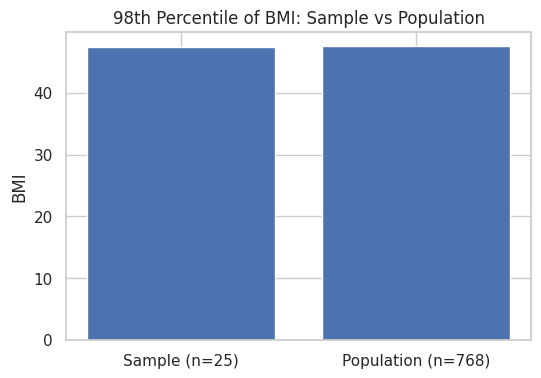

In [15]:
plt.figure(figsize=(6,4))
plt.bar(["Sample (n=25)", "Population (n=768)"],
        [sample_bmi_98, pop_bmi_98])
plt.title("98th Percentile of BMI: Sample vs Population")
plt.ylabel("BMI")
plt.show()

bootstrap

In [16]:
n_boot = 500
sample_size = 150
percentile_p = 95  # change to 98 if you want

boot_means = []
boot_stds = []
boot_perc = []

bp = dataset["BloodPressure"].dropna().values  # ensure no NA

for i in range(n_boot):
    boot_sample = np.random.choice(bp, size=sample_size, replace=True)
    boot_means.append(np.mean(boot_sample))
    boot_stds.append(np.std(boot_sample, ddof=1))
    boot_perc.append(np.percentile(boot_sample, percentile_p))

boot_means = np.array(boot_means)
boot_stds = np.array(boot_stds)
boot_perc = np.array(boot_perc)

# Bootstrap average statistics
boot_mean_avg = boot_means.mean()
boot_std_avg = boot_stds.mean()
boot_perc_avg = boot_perc.mean()

# Population statistics
pop_bp_mean = bp.mean()
pop_bp_std = bp.std(ddof=1)
pop_bp_perc = np.percentile(bp, percentile_p)

boot_mean_avg, boot_std_avg, boot_perc_avg, pop_bp_mean, pop_bp_std, pop_bp_perc

(np.float64(68.99801333333333),
 np.float64(19.336273273917737),
 np.float64(91.09369999999998),
 np.float64(69.10546875),
 np.float64(19.355807170644777),
 np.float64(90.0))

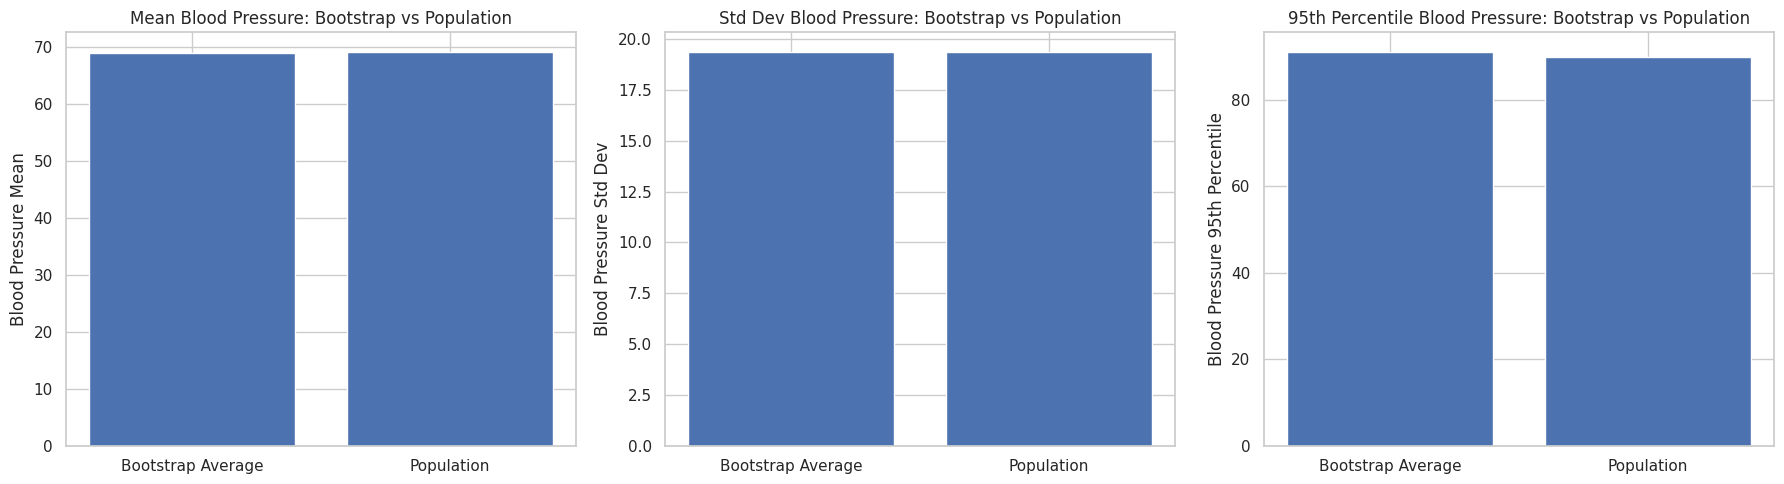

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Mean Blood Pressure
axes[0].bar(["Bootstrap Average", "Population"],
            [boot_mean_avg, pop_bp_mean])
axes[0].set_title("Mean Blood Pressure: Bootstrap vs Population")
axes[0].set_ylabel("Blood Pressure Mean")

# Standard Deviation Blood Pressure
axes[1].bar(["Bootstrap Average", "Population"],
            [boot_std_avg, pop_bp_std])
axes[1].set_title("Std Dev Blood Pressure: Bootstrap vs Population")
axes[1].set_ylabel("Blood Pressure Std Dev")

# 95th Percentile Blood Pressure
axes[2].bar(["Bootstrap Average", "Population"],
            [boot_perc_avg, pop_bp_perc])
axes[2].set_title("95th Percentile Blood Pressure: Bootstrap vs Population")
axes[2].set_ylabel("Blood Pressure 95th Percentile")

plt.tight_layout()
plt.show()

#REPORT ON THE FINDINGS
Sample vs. Population (Glucose): We observed that a small random sample (n=25) yielded a mean glucose of np.float64(110.24) and a maximum glucose of 144. These values deviated from the population's mean glucose of np.float64(120.89) and maximum glucose of 199. This highlights how a small sample might not perfectly represent the larger population.

Sample vs. Population (BMI 98th Percentile): When comparing the 98th percentile of BMI for the same small sample, we found np.float64(47.504), which was remarkably close to the population's 98th percentile of np.float64(47.526). This suggests that for certain statistics, even small samples can provide reasonable estimates.

Bootstrap vs. Population (Blood Pressure): Using bootstrapping with 500 resamples of size 150 for 'BloodPressure', we found that the average bootstrap statistics were very close to the actual population parameters:

Mean Blood Pressure: Bootstrap average was np.float64(68.998), very close to the population mean of np.float64(69.105).
Standard Deviation of Blood Pressure: Bootstrap average was np.float64(19.336), also very close to the population standard deviation of np.float64(19.356).
95th Percentile of Blood Pressure: Bootstrap average was np.float64(91.094), quite close to the population's 95th percentile of np.float64(90.0).
These bootstrap results demonstrate the power of resampling techniques to estimate population parameters and their distributions, even when the full population is not directly available.